# Using the Youtube API to search and pull video info from a channel

This notebook is just a quick run-through of searching videos on a Youtube channel and pulling some basic info about these videos, all using the Youtube API.

In [1]:
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser

import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

Set up your credentials and other arguments you need to create a Youtube Resource Object and access the API. Go [here](https://www.slickremix.com/docs/get-api-key-for-youtube/) for some information on getting those credentials.

In [2]:
DEVELOPER_KEY = # put your API key here
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

Here I'm querying the channel for [Course Report](https://www.youtube.com/channel/UCB9W1F-TkcriKx3w7C8eLeg) with a query about the [Metis Data Science](https://www.thisismetis.com) program, and retrieving information on up to 10 results. 

In [3]:
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)
search_response = youtube.search().list(
        part="id,snippet",
        channelId="UCB9W1F-TkcriKx3w7C8eLeg",
        maxResults = 10,
        q="Metis"
    ).execute()

Here's an example of the results of my search. If you look closely enough, you'll see descriptions for the channel and videos get cut off. I'll have to use the `Video` resource to get more detailed information for each video.

In [4]:
search_response

{'etag': '"nxOHAKTVB7baOKsQgTtJIyGxcs8/z95VIUpJSHc76EBNIHOvChWL0Dg"',
 'items': [{'etag': '"nxOHAKTVB7baOKsQgTtJIyGxcs8/4nnicLcLD3dzbri0fEBksGsEeas"',
   'id': {'kind': 'youtube#video', 'videoId': 'GqfNfNWVaGY'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UCB9W1F-TkcriKx3w7C8eLeg',
    'channelTitle': 'Course Report',
    'description': "Data science programs often require background knowledge in statistics and coding. So we're diving into the admissions process at data science bootcamp ...",
    'liveBroadcastContent': 'none',
    'publishedAt': '2017-03-03T21:18:20.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/GqfNfNWVaGY/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/GqfNfNWVaGY/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/GqfNfNWVaGY/mqdefault.jpg',
      'width': 320}},
    'title': 'How to Get In to a Dat

Now, repeating the process for the [Flatiron School](https://flatironschool.com/):

In [5]:
search_response2 = youtube.search().list(
        part="id,snippet",
        channelId="UCB9W1F-TkcriKx3w7C8eLeg",
        maxResults = 10,
        q="Flatiron School"
    ).execute()

In [6]:
search_response2

{'etag': '"nxOHAKTVB7baOKsQgTtJIyGxcs8/-90g2EIuc3h-tB2E7BglOlSufJY"',
 'items': [{'etag': '"nxOHAKTVB7baOKsQgTtJIyGxcs8/z2mlUXVPo3cN3KzBdvKABNggysc"',
   'id': {'kind': 'youtube#video', 'videoId': 'g-ol9_wyx-o'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UCB9W1F-TkcriKx3w7C8eLeg',
    'channelTitle': 'Course Report',
    'description': 'Flatiron School grads Eva Leake and Saige Leslie show us the advanced apps they built for their final projects after 3 months at coding bootcamp! Plus find out ...',
    'liveBroadcastContent': 'none',
    'publishedAt': '2018-10-03T15:41:18.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/g-ol9_wyx-o/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/g-ol9_wyx-o/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/g-ol9_wyx-o/mqdefault.jpg',
      'width': 320}},
    'title': 'What We Built 

Now, I'm going to collect info for each video from these two searches in a series of lists which are initialized to be empty.

In [7]:
ids = []
titles = []
descriptions = []
durations = []
viewCounts = []
likeCounts = []
dislikeCounts = []

Populate the lists above for all items in the search results.

In [8]:
for search_result in [search_response, search_response2]:  
    for response in search_result.get("items", []):
        # check if the item is a video and not a playlist or channel
        if response['id']['kind'] == 'youtube#video':
            # for this video get the video id and title from the search results
            ids.append(response['id']['videoId'])
            titles.append(response['snippet']['title'])

            # get a video result object for this video
            vid_resp = youtube.videos().list(
                part="snippet,statistics,contentDetails",
                id=response['id']['videoId']
            ).execute()

            # get the video's descrption, duration, and counts for views, likes and dislikes
            descriptions.append(vid_resp['items'][0]['snippet']['description'])
            durations.append(vid_resp['items'][0]['contentDetails']['duration'])
            viewCounts.append(int(vid_resp['items'][0]['statistics']['viewCount']))
            likeCounts.append(int(vid_resp['items'][0]['statistics']['likeCount']))
            dislikeCounts.append(int(vid_resp['items'][0]['statistics']['dislikeCount']))

Now push all these lists for all the videos into a dict and make a DataFrame out of it:

In [9]:
keys = ['id', 'title', 'description', 'duration', 'views', 'likes', 'dislikes']
values = [ids, titles, descriptions, durations, viewCounts, likeCounts, dislikeCounts]
vids_df = pd.DataFrame({k:v for k, v in zip(keys, values)})

In [10]:
vids_df

,id,title,description,duration,views,likes,dislikes
0,GqfNfNWVaGY,How to Get In to a Data Science Bootcamp: Metis!,Data science programs often require background...,PT43M29S,9225,34,1
1,jknTOD9nRZA,Learn this Before Data Science Bootcamp with D...,Can anyone learn data science? What do you nee...,PT6M39S,6433,132,4
2,a5jqDSiJdxk,Math for Data Science Webinar with Metis,Kim from Metis walks us through all the math y...,PT41M5S,409,5,0
3,j0lkiBtgo3g,How to Ace a Data Science Job Interview with M...,What happens in a data science job interview? ...,PT43M20S,3424,40,2
4,KsjUMXOnb9o,An Intro to SQL for Data Science with Metis,"As you’re researching technology bootcamps, we...",PT37M7S,215,3,0
5,okH7wHCshgw,Getting Hired After Data Science Bootcamp with...,We spoke to Megan Ayraud of Metis and Brennan ...,PT27M5S,4301,36,1
6,Ndf4HB_qn_A,2 Years Later: Metis Grads work at Lyft + Driv...,Read the full transcript here: http://bit.ly/m...,PT42M20S,386,6,0
7,tOuTcI1gTd8,Q&amp;A Interview with Metis Data Science Boot...,We sat down with two Metis Data Science Bootca...,PT38M41S,1637,10,0
8,02ZvpYq1oBU,How to Land a Data Science Job in Seattle with...,Can bootcamp graduates really get data science...,PT37M46S,273,7,1
9,g-ol9_wyx-o,What We Built at Flatiron School – Coding Boot...,Flatiron School grads Eva Leake and Saige Lesl...,PT9M10S,6922,94,5


OK, so there are a couple issues here -- there appears to be at least one duplicate entry (one video occurred in each search, I guess?) and the durations are in [ISO 8601](https://www.digi.com/resources/documentation/digidocs/90001437-13/reference/r_iso_8601_duration_format.htm). Also I have to assign which program each video is about (though I guess I could have done that earlier during the separate search queries!)

Let's start by defining functions to 1) convert the durations to seconds and 2) assign the program each video discusses based on title and description and apply those changes to `vids_df`.

In [11]:
def iso_to_dur(isodur):
    mins, secs = isodur[2:-1].split('M')
    return int(secs) + 60*int(mins)

In [12]:
def which_program(row):
    text = ' '.join([row['title'], row['description']])
    if 'Metis' in text:
        return 'Metis'
    elif 'Flatiron' in text:
        return 'Flatiron'
    else:
        return None

In [13]:
vids_df['duration'] = vids_df['duration'].map(iso_to_dur)

In [14]:
vids_df['program'] = vids_df.apply(which_program, axis=1)

In [15]:
vids_df

,id,title,description,duration,views,likes,dislikes,program
0,GqfNfNWVaGY,How to Get In to a Data Science Bootcamp: Metis!,Data science programs often require background...,2609,9225,34,1,Metis
1,jknTOD9nRZA,Learn this Before Data Science Bootcamp with D...,Can anyone learn data science? What do you nee...,399,6433,132,4,Metis
2,a5jqDSiJdxk,Math for Data Science Webinar with Metis,Kim from Metis walks us through all the math y...,2465,409,5,0,Metis
3,j0lkiBtgo3g,How to Ace a Data Science Job Interview with M...,What happens in a data science job interview? ...,2600,3424,40,2,Metis
4,KsjUMXOnb9o,An Intro to SQL for Data Science with Metis,"As you’re researching technology bootcamps, we...",2227,215,3,0,Metis
5,okH7wHCshgw,Getting Hired After Data Science Bootcamp with...,We spoke to Megan Ayraud of Metis and Brennan ...,1625,4301,36,1,Metis
6,Ndf4HB_qn_A,2 Years Later: Metis Grads work at Lyft + Driv...,Read the full transcript here: http://bit.ly/m...,2540,386,6,0,Metis
7,tOuTcI1gTd8,Q&amp;A Interview with Metis Data Science Boot...,We sat down with two Metis Data Science Bootca...,2321,1637,10,0,Metis
8,02ZvpYq1oBU,How to Land a Data Science Job in Seattle with...,Can bootcamp graduates really get data science...,2266,273,7,1,Metis
9,g-ol9_wyx-o,What We Built at Flatiron School – Coding Boot...,Flatiron School grads Eva Leake and Saige Lesl...,550,6922,94,5,Flatiron


Ok, now let's drop the duplicate(s) and remove the one video that isn't specifically about either Metis or Flatiron.

In [16]:
vids_df = vids_df.drop_duplicates(keep='first').dropna().reset_index().drop(columns='index')

Now let's just do some basic "analysis" and see if there's anything interesting we can observe in the distributions of durations, views, likes, and dislikesa for each set of videos. I'll do durations and views together first, and then likes and dislikes due to the different scales.

In [17]:
vids_melted = pd.melt(vids_df, id_vars=['program'], value_vars=['duration', 'views'])

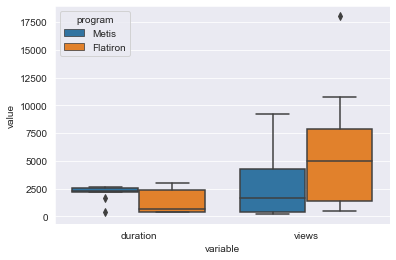

In [18]:
sns.boxplot(x='variable', y='value', hue='program', data = vids_melted)

In [19]:
vids_melted2 = pd.melt(vids_df, id_vars=['program'], value_vars=['likes', 'dislikes'])

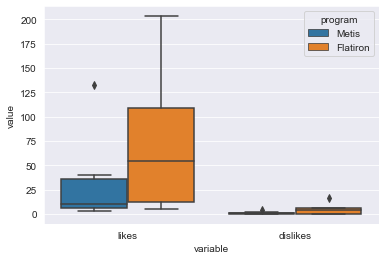

In [20]:
sns.boxplot(x='variable', y='value', hue='program', data = vids_melted2)

So these boxplots aren't quite that illuminating, but we can see that the videos about Metis appear to be longer generally but confined to a much narrower band of durations with some outlier short vidoeos. Perhaps for this reason (but not solely) the vidoes about Flatiron tend to get more views.

Perhaps because of the larger number of views, these videos also tend to receive more likes and dislikes and a wider range of each type of reaction compared to the videos about Metis -- some of which is borne out further in looking at some of the descriptive stats below:

In [21]:
vids_df.groupby('program').agg(['median', 'max', 'min'])

duration             views              likes          dislikes      \
           median   max  min median    max  min median  max min   median max   
program                                                                        
Flatiron      633  2980  347   4945  18032  439     54  203   5      4.5  16   
Metis        2321  2609  399   1637   9225  215     10  132   3      1.0   4   

              
         min  
program       
Flatiron   0  
Metis      0